# ***Predict Loan Eligibility for Dream Housing Finance company***

* Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.



* Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## ***`Data Dictionary`***


**Variable	Description**

 **bold text**
Loan_ID	Unique Loan ID

Gender	Male/ Female

Married	Applicant married (Y/N)

Dependents	Number of dependents

Education	Applicant Education (Graduate/ Under Graduate)

Self_Employed	Self employed (Y/N)

ApplicantIncome	Applicant income

CoapplicantIncome	Coapplicant income

LoanAmount	Loan amount in thousands

Loan_Amount_Term	Term of loan in months

Credit_History	credit history meets guidelines

Property_Area	Urban/ Semi Urban/ Rural

Loan_Status	(Target) Loan approved (Y/N)


## ***Importing Libraries***

In [ ]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#loading the data set
df = pd.read_csv(r"/content/train_ctrUa4K.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#lets check the shape 
print('Shape of train dataset:',df.shape)

Shape of train dataset: (614, 13)


In [ ]:
#check the data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#lets check for Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

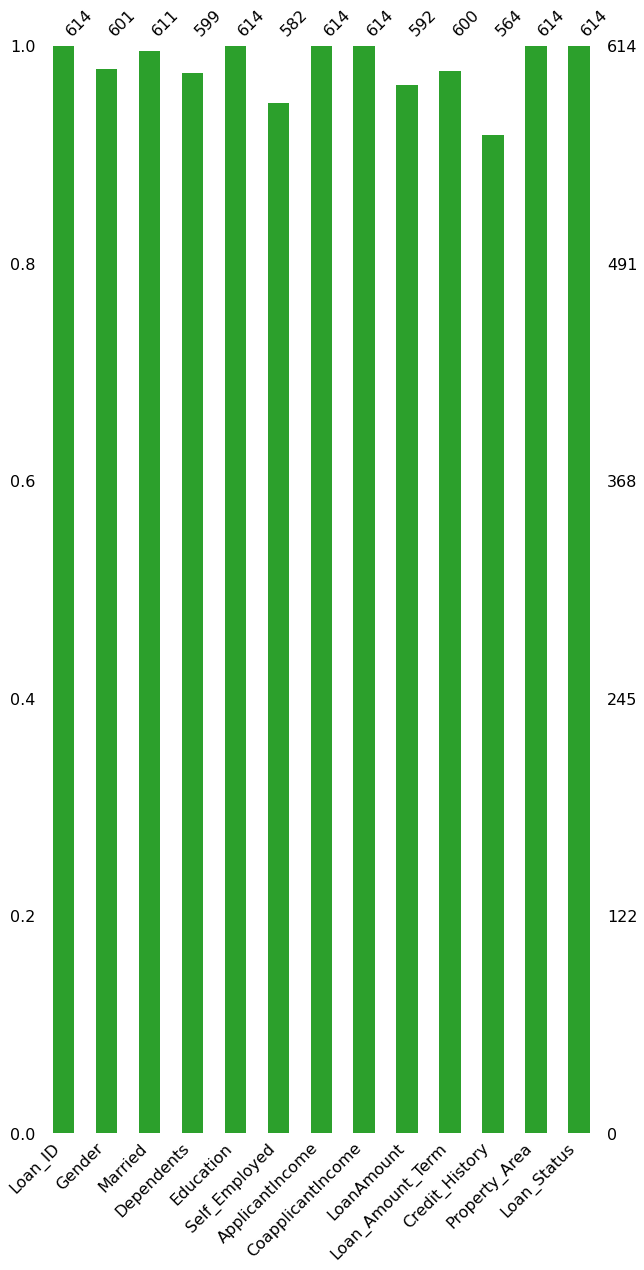

In [ ]:
missingno.bar(df, figsize = (10,20), color="tab:green")

In [ ]:
#lets check for Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.drop(columns = 'Loan_ID', inplace = True)

In [ ]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## **Filling missing values**

In [ ]:
#Lets replace null values from all missing  numerical columns with the mean value of that column
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)


In [ ]:
#Lets replace null values from  all missing  Categorical columns with the mean value of that column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
column = ['Dependents']
for i in column:
    df[i] = df[i].replace({'3+':3, np.nan:0})

In [ ]:
#lets check for Null Values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Converting Dependent column data type from Object to integer

In [ ]:
#lets convert TotalCharges to numeric data
df["Dependents"]=df["Dependents"].str.strip()
df["Dependents"]=pd.to_numeric(df["Dependents"])

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here in our data set on the bases of some observations we can say that some values are given as ? mark, we need to replace them with suitable values.

In [ ]:
#Lets check which columns contains '?'
df[df.columns[(df == '?').any()]].nunique()


Series([], dtype: float64)

In [ ]:
#Lets chcek the value counts for categorical data
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('---------'*10)

Male      502
Female    112
Name: Gender, dtype: int64
------------------------------------------------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64
------------------------------------------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
------------------------------------------------------------------------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
------------------------------------------------------------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
------------------------------------------------------------------------------------------
Y    422
N    192
Name: Loan_Status, dtype: int64
------------------------------------------------------------------------------------------


In [ ]:
for col in df.columns:
    print(col,df[col].nunique())
    print('-'*35)

Gender 2
-----------------------------------
Married 2
-----------------------------------
Dependents 3
-----------------------------------
Education 2
-----------------------------------
Self_Employed 2
-----------------------------------
ApplicantIncome 505
-----------------------------------
CoapplicantIncome 287
-----------------------------------
LoanAmount 204
-----------------------------------
Loan_Amount_Term 11
-----------------------------------
Credit_History 3
-----------------------------------
Property_Area 3
-----------------------------------
Loan_Status 2
-----------------------------------


# ***EDA***

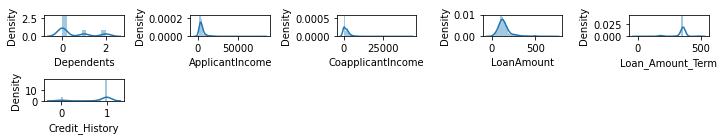

In [ ]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (10,15))
plotnumber = 1
for column in num_data:
    if plotnumber <=10:
        ax = plt.subplot(17,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

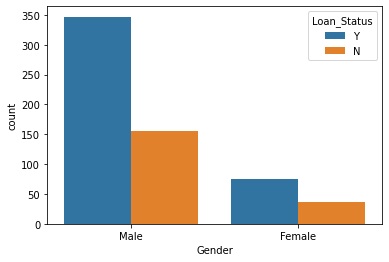

In [ ]:
#lets check relation between gender and Loan_Status
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = df)
plt.show()

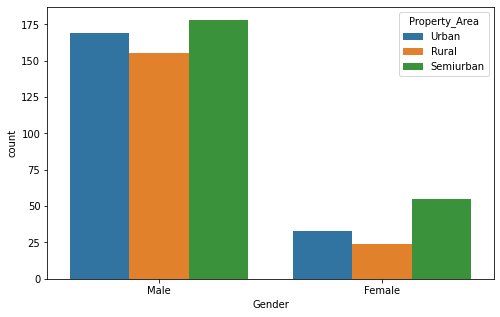

In [ ]:
#lets check the fraud_report based on age
plt.figure(figsize = (8,5))
sns.countplot(x = 'Gender', hue = 'Property_Area', data = df)
plt.show()

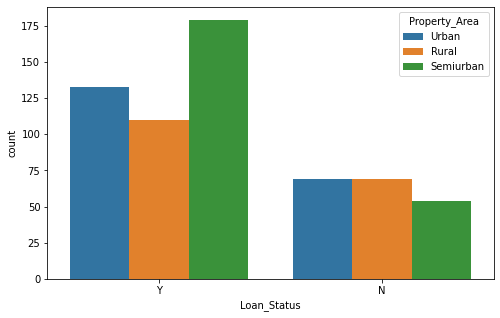

In [ ]:
#lets check the fraud_report based on age
plt.figure(figsize = (8,5))
sns.countplot(x = 'Loan_Status', hue = 'Property_Area', data = df)
plt.show()

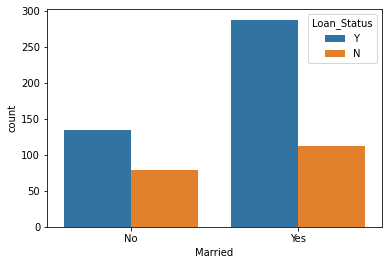

In [ ]:
#lets check relation between Maried and Loan_Status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df)
plt.show()

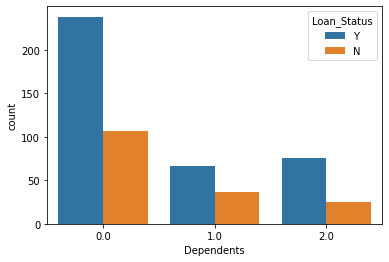

In [ ]:
#lets check relation between gender and churn
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = df)
plt.show()

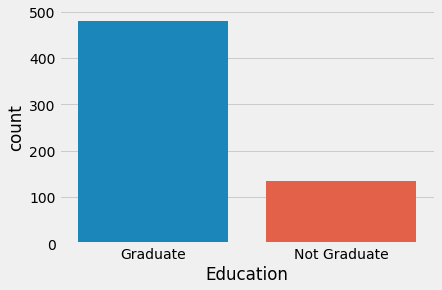

In [ ]:
#lets check counts for Education
plt.style.use('fivethirtyeight')
sns.countplot(x = 'Education', data = df)
plt.show()

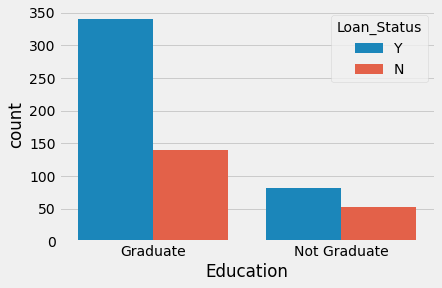

In [ ]:
#check the relation between column Education and Loan Status
sns.countplot(x = 'Education', hue = 'Loan_Status', data = df)
plt.show()

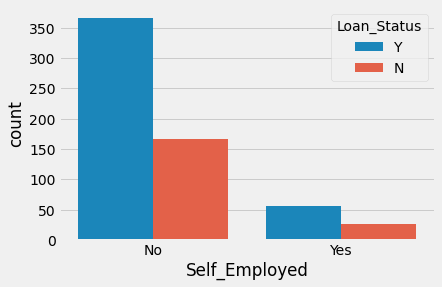

In [ ]:
#lets check counts for Self_Employed Y/N
sns.countplot(x = 'Self_Employed',hue = 'Loan_Status', data = df)
#plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

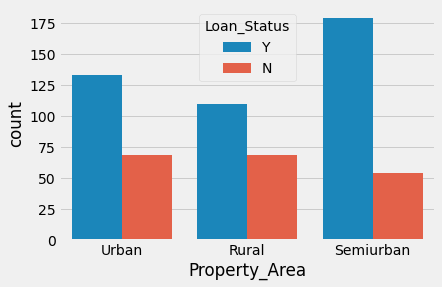

In [ ]:
#check the relation between column Education and Loan Status
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = df)
plt.show()

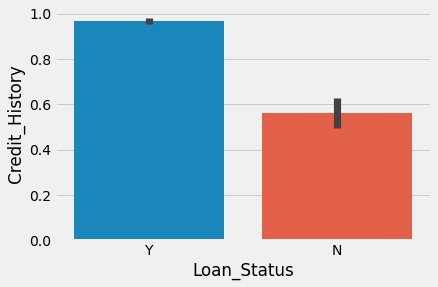

In [ ]:
#lets plot barplot for MonthlyCharges vs churn
sns.barplot(x = 'Loan_Status', y = 'Credit_History', data = df)
plt.show()

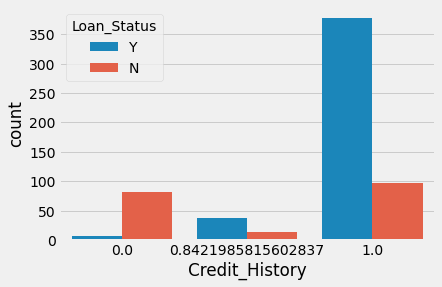

In [ ]:
#lets check counts for Self_Employed Y/N
sns.countplot(x = 'Credit_History',hue = 'Loan_Status', data = df)
plt.show()

Y    422
N    192
Name: Loan_Status, dtype: int64


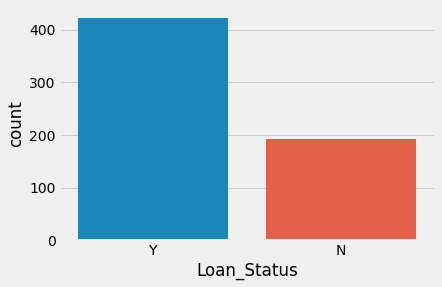

In [ ]:
#lets have a look on our target variable
sns.countplot(df['Loan_Status'])
print(df['Loan_Status'].value_counts())
plt.show()

Here we see that nearly 50% people are not getting loan.

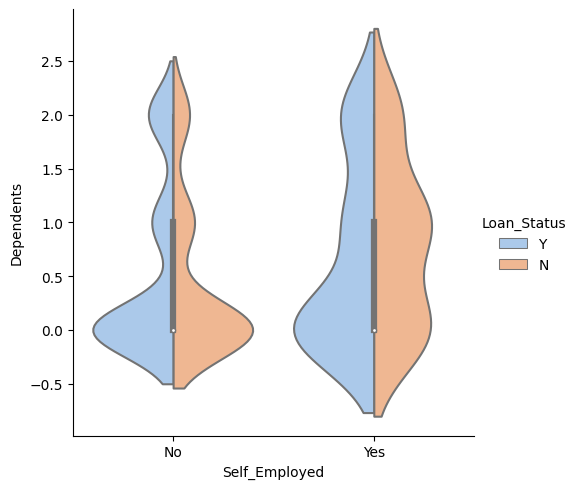

In [ ]:
#lets check the relation between Dependents, TotalCharges, churn using Violin plot
plt.style.use('default')
sns.catplot(x="Self_Employed", y="Dependents", hue="Loan_Status",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

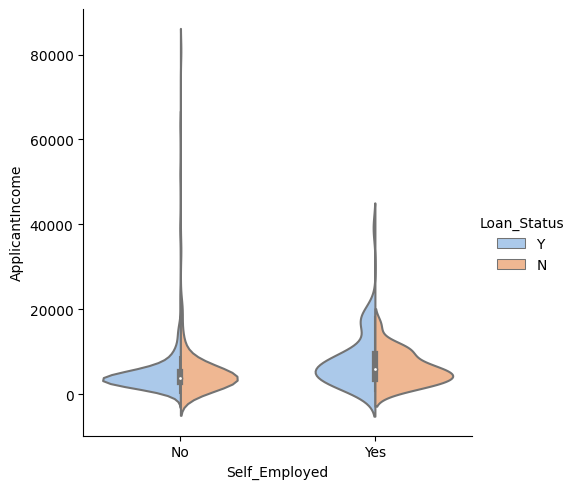

In [ ]:
#lets check the relation between Dependents, TotalCharges, churn using Violin plot
plt.style.use('default')
sns.catplot(x="Self_Employed", y="ApplicantIncome", hue="Loan_Status",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

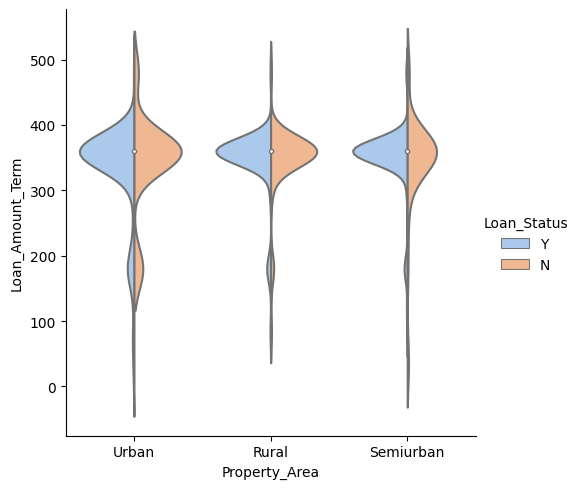

In [ ]:
#lets check the relation between Property_Area, Loan_amount_Term and loan status using Violin plot
sns.catplot(x="Property_Area", y="Loan_Amount_Term", hue="Loan_Status",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

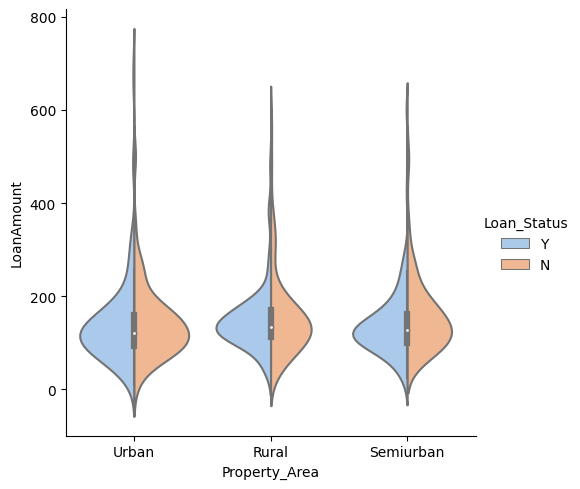

In [ ]:
#lets check the relation between Property_Area, Loan_amount_Term and loan status using Violin plot
sns.catplot(x="Property_Area", y="LoanAmount", hue="Loan_Status",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

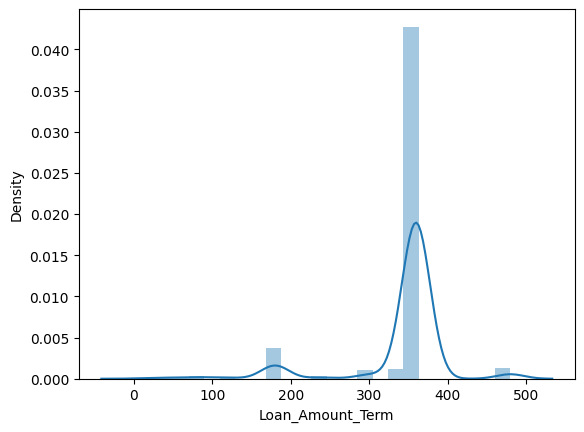

In [ ]:
#lets have a look at destribution of Loan_Amount_Term
sns.distplot(df['Loan_Amount_Term'])
plt.show()

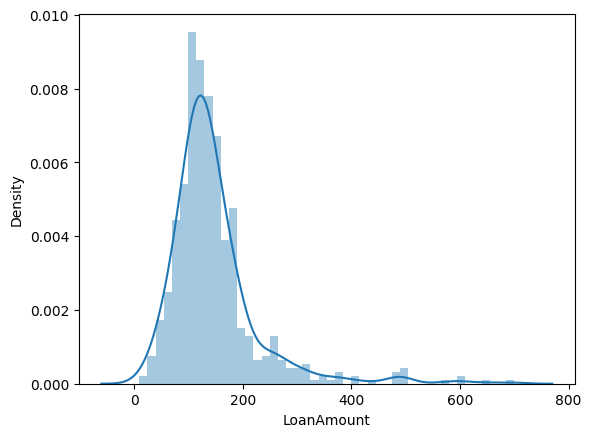

In [ ]:
#lets have a look on capital gains
sns.distplot(df['LoanAmount'])
plt.show()

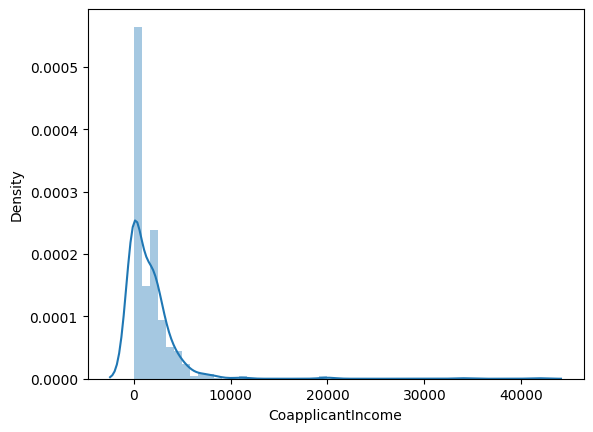

In [ ]:
#lets have a look on capital gains
sns.distplot(df['CoapplicantIncome'])
plt.show()

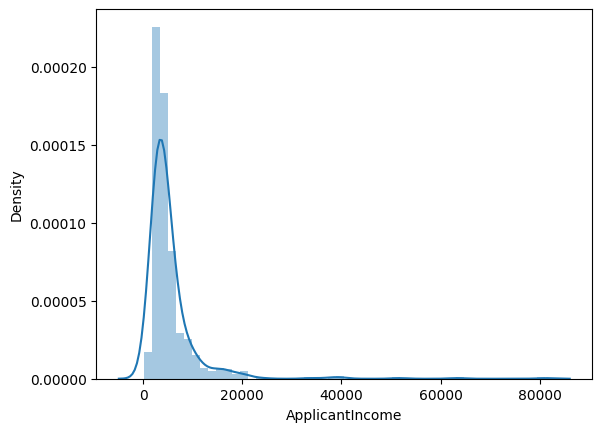

In [ ]:
#lets have a look on capital gains
sns.distplot(df['ApplicantIncome'])
plt.show()

In [ ]:
#if you want to group many columns you can use like date

# plotting barplot for Loan_ID vs LoanAmount (1000)
#fig = plt.figure(figsize=(5,3))
#ax = df.groupby('Loan_ID').LoanAmount.count().plot.bar(ylim=0)
#ax.set_ylabel('Loan Amount in thousands')
#plt.show()

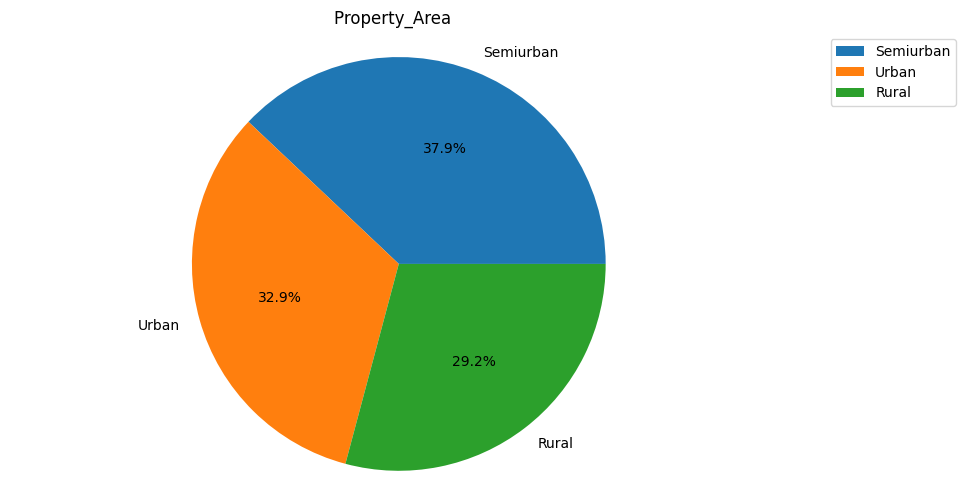

In [ ]:
#Lets have a look on loan_status_relationship, how it is distributed
plt.figure(figsize=(10, 6))
plt.pie( df["Property_Area"].value_counts().values, labels = df["Property_Area"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('Property_Area  ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

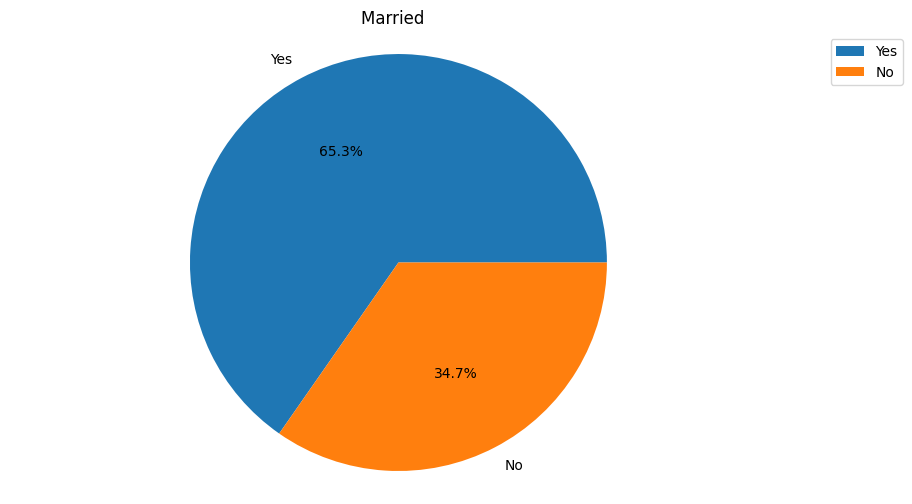

In [ ]:
#Lets have a look on loan_status_relationship, how it is distributed
plt.figure(figsize=(10, 6))
plt.pie( df["Married"].value_counts().values, labels = df["Married"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('Married  ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()



---



---



# ***Data processing***

## **Apply label encoder to target variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder
leb_enc = LabelEncoder()
df2 = leb_enc.fit_transform(df["Loan_Status"])
pd.Series(df2)
df["Loan_Status"] = df2

## Heat map for checking correlation

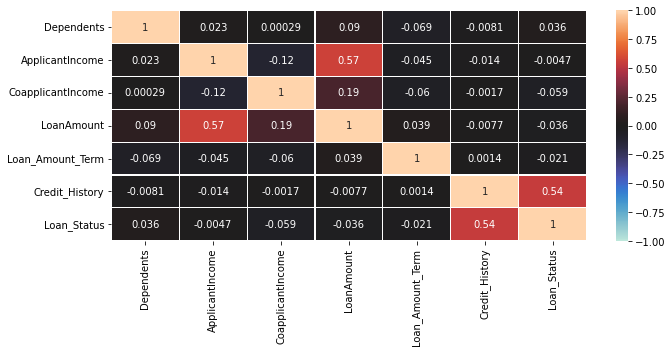

In [ ]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

In [ ]:
#lets describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,548.0,0.554745,0.785329,0.0,0.00,0.0,1.00,2.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.00,1.0,1.00,1.0


## Checking for outliers using box plots

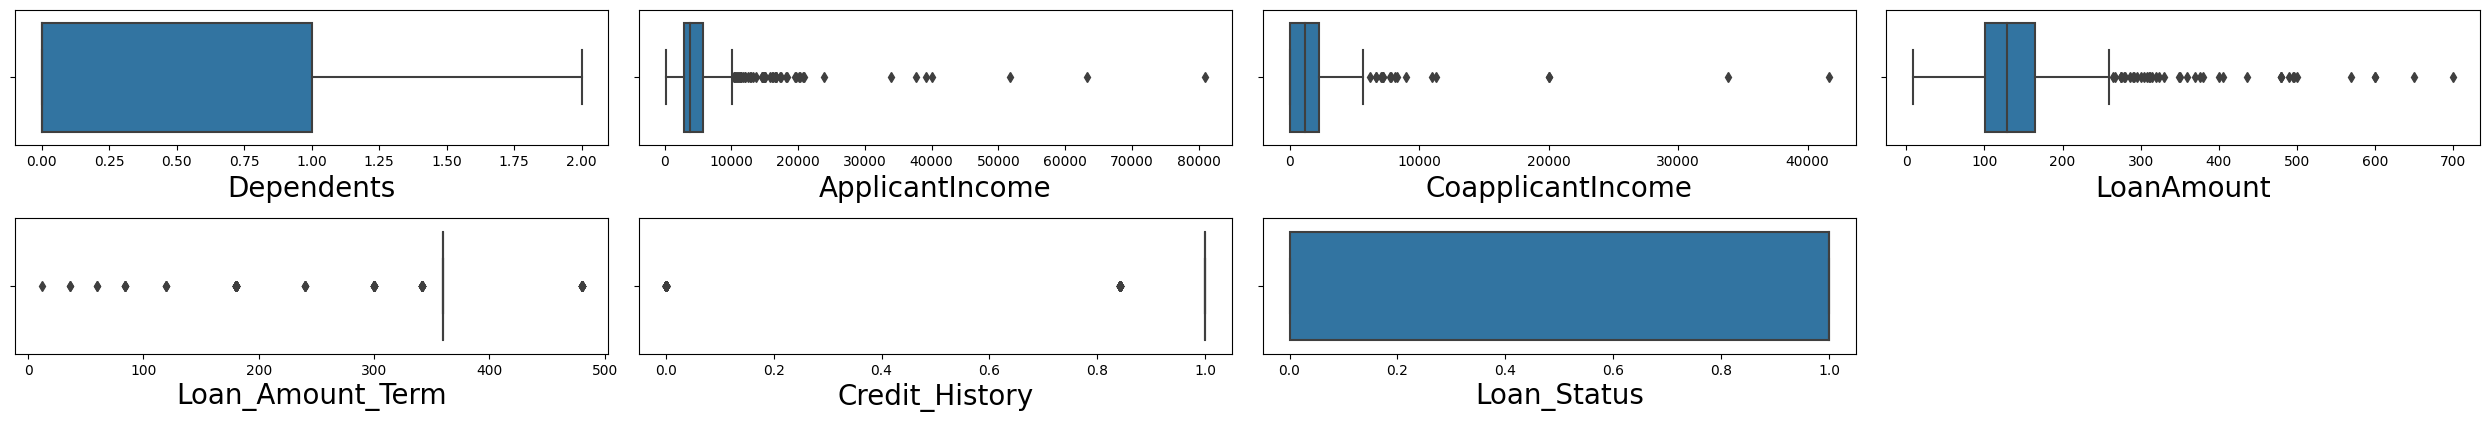

In [ ]:
#lets check outliers from continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (25,10))
plotnumber = 1
for column in num_data:
    if plotnumber <=10:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## **Removing Outliers**

In [ ]:
#lets remove outliers using zscore method
#from scipy import stats
#from scipy.stats import zscore
#z_score = zscore(df[["age","policy_annual_premium","umbrella_limit","total_claim_amount","property_claim"]])
#abs_z_score = np.abs(z_score)
#filtering_entry = (abs_z_score < 3).all(axis = 1)
#df = df[filtering_entry]
#df.reset_index(inplace = True)

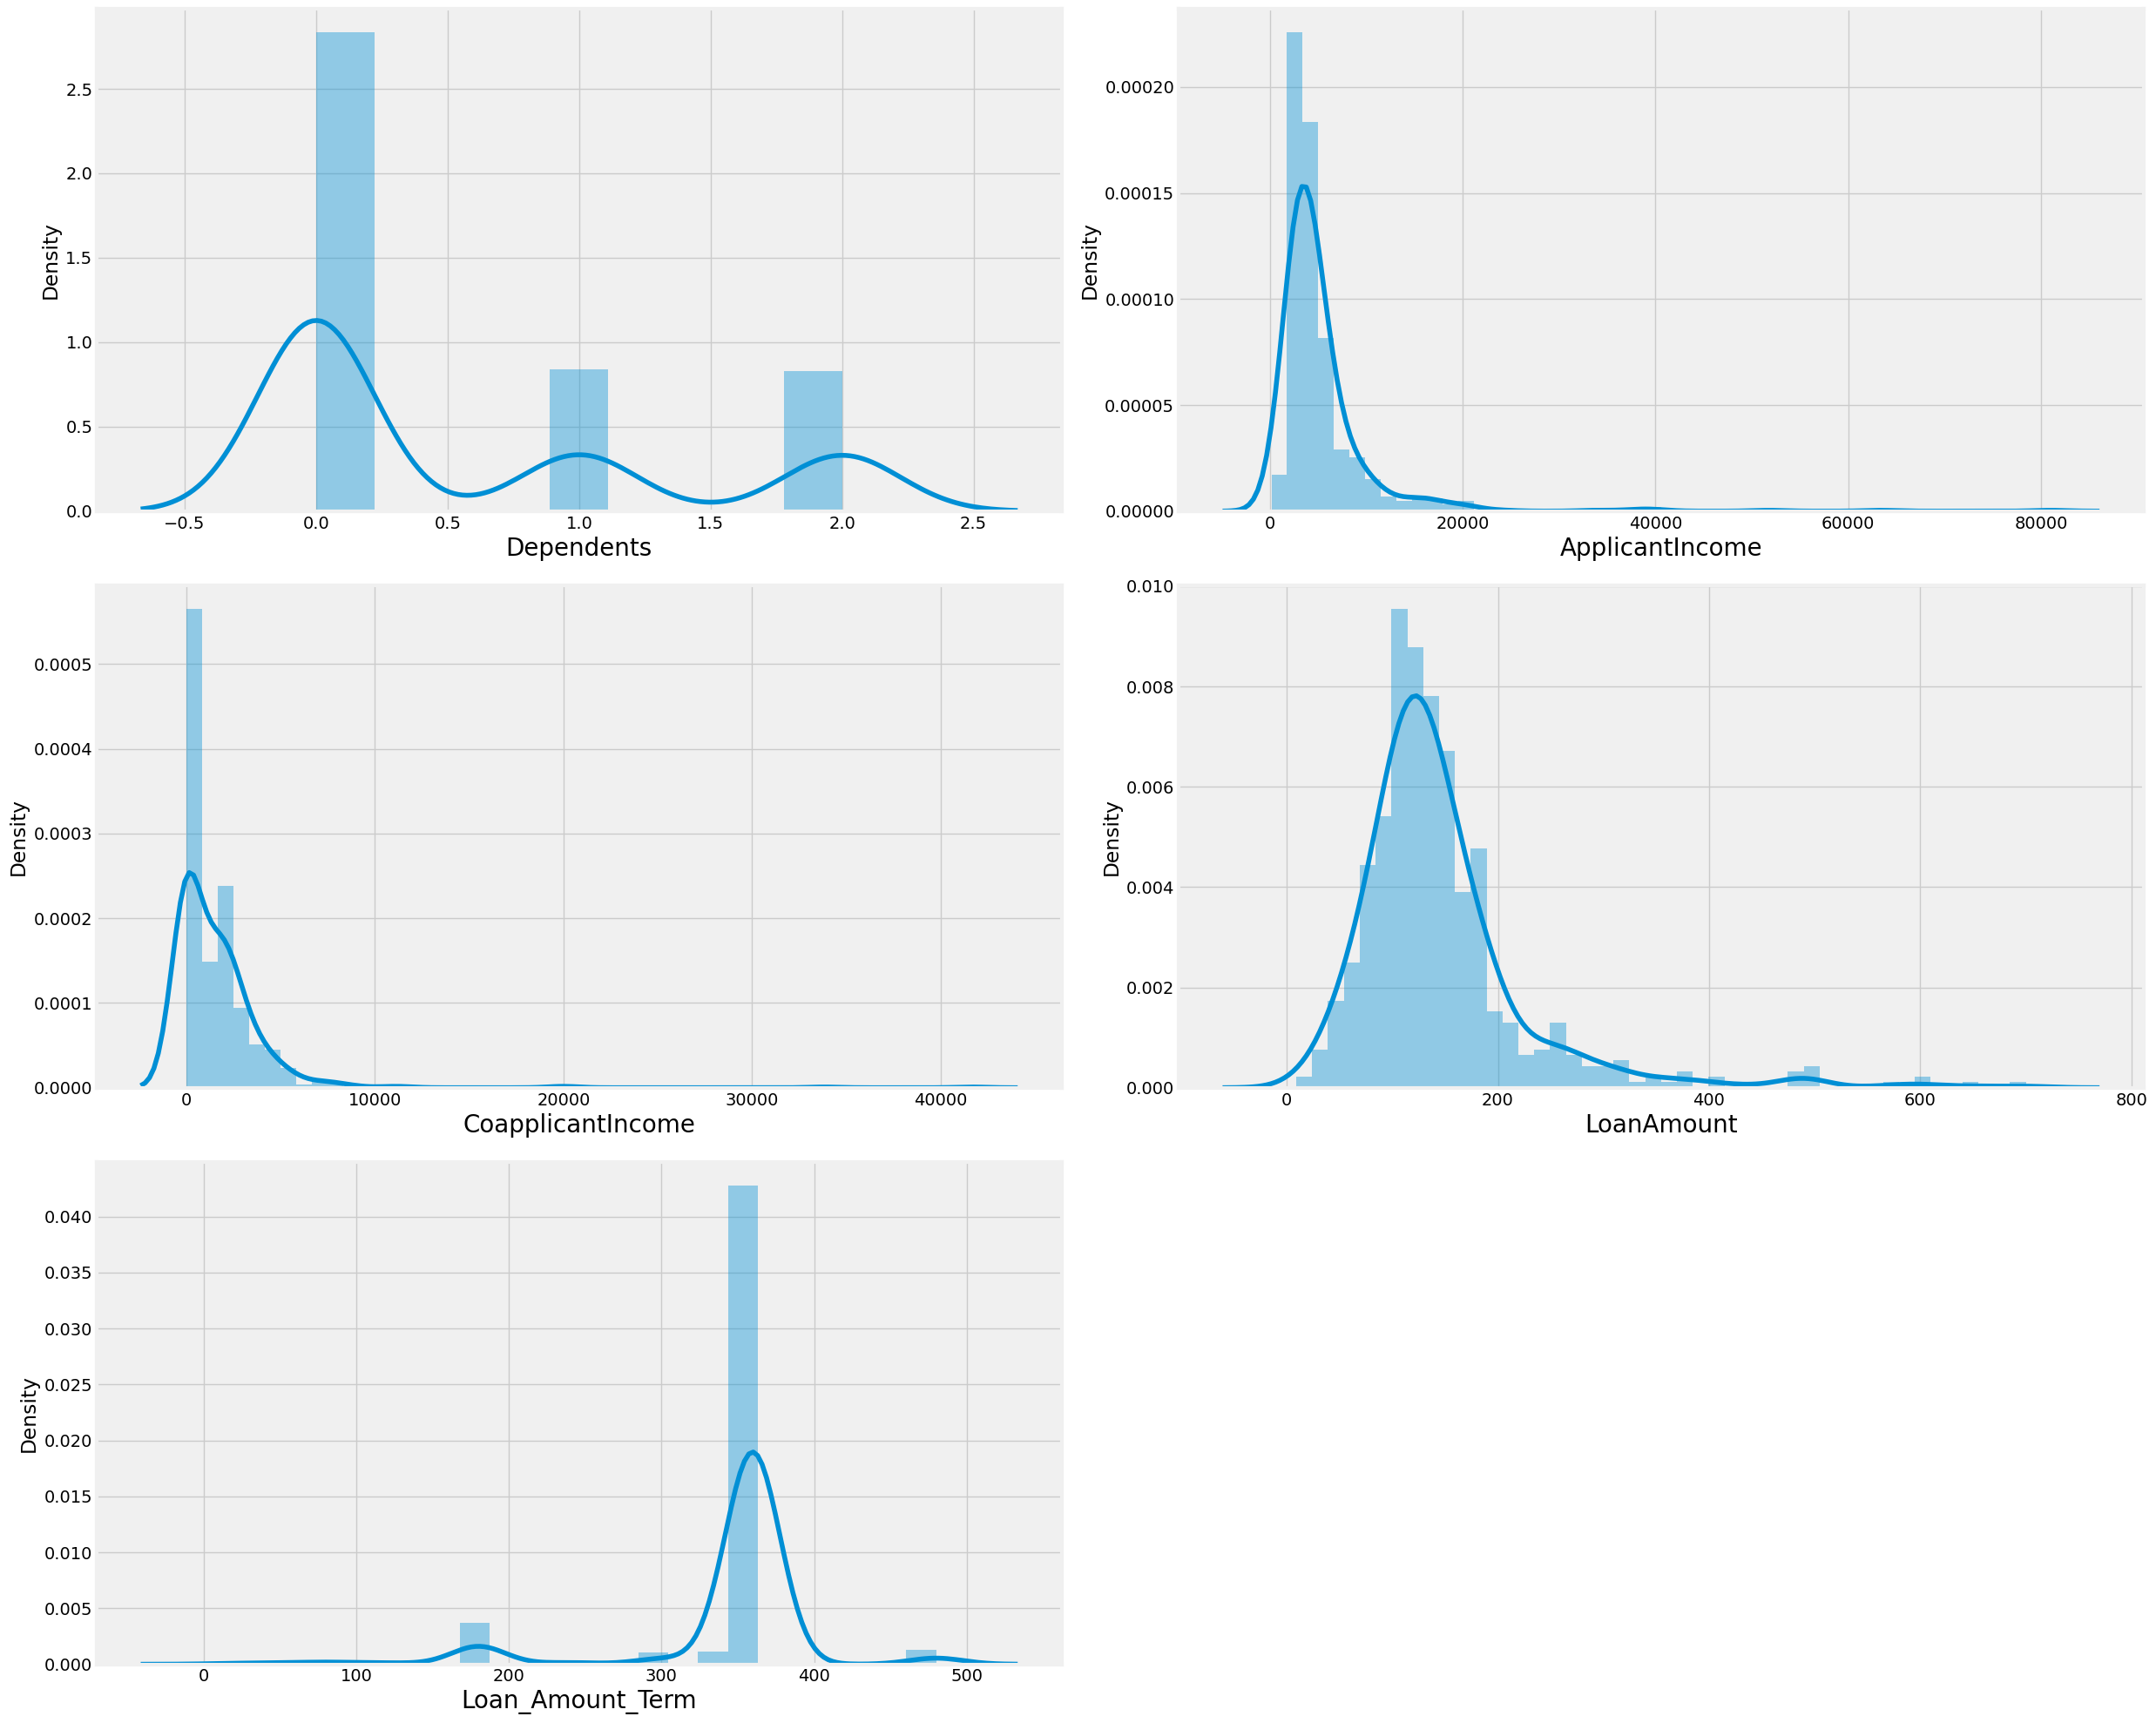

In [ ]:
#lets see the destribution of numerical data
num_data = df._get_numeric_data()
plt.figure(figsize = (25,20))
plt.style.use('fivethirtyeight')
plotnumber = 1
for column in num_data:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
#lets check for skewness
df.skew()

Dependents           0.966037
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

# Separate features and label as x & y respectively

In [ ]:
x = df.drop(columns = 'Loan_Status')
y = df['Loan_Status']

In [ ]:
x.skew()

Dependents           0.966037
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [ ]:
#Lets treat the skewness from numerical columns
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.cbrt(x[index])

In [ ]:

#check the skewness again
x.skew()

Dependents           0.762955
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
dtype: float64

In [ ]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

## Applying StandardScaler to numerical features

In [ ]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num)
x_num = pd.DataFrame(x_num,columns=num.columns)

In [ ]:
#combine both numerical and categorical features
X = pd.concat([x_num,cat], axis = 1)

In [ ]:
#lets have a look at our features
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area
0,-0.737600,0.516186,-1.107783,0.249219,0.281947,0.426468,Male,No,Graduate,No,Urban
1,0.804689,0.137806,0.782158,-0.022525,0.281947,0.426468,Male,Yes,Graduate,No,Rural
2,-0.737600,-0.519479,-1.107783,-1.356846,0.281947,0.426468,Male,Yes,Graduate,Yes,Urban
3,-0.737600,-0.751605,0.897526,-0.152922,0.281947,0.426468,Male,Yes,Not Graduate,No,Urban
4,-0.737600,0.555727,-1.107783,0.173033,0.281947,0.426468,Male,No,Graduate,No,Urban


## **Encoding**

In [ ]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [ ]:
#lets have a look at data after encoding
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area
0,-0.737600,0.516186,-1.107783,0.249219,0.281947,0.426468,1.0,0.0,0.0,0.0,2.0
1,0.804689,0.137806,0.782158,-0.022525,0.281947,0.426468,1.0,1.0,0.0,0.0,0.0
2,-0.737600,-0.519479,-1.107783,-1.356846,0.281947,0.426468,1.0,1.0,0.0,1.0,2.0
3,-0.737600,-0.751605,0.897526,-0.152922,0.281947,0.426468,1.0,1.0,1.0,0.0,2.0
4,-0.737600,0.555727,-1.107783,0.173033,0.281947,0.426468,1.0,0.0,0.0,0.0,2.0


In [ ]:
#check the shape
X.shape

(614, 11)

In [ ]:
#check value count for target variable
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

We can see that this is a case of imbalance, so will do oversampling

## **Over sampling**

In [ ]:
#lets drop Dependdent column
X.drop(columns = 'Dependents', inplace = True)

In [ ]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [ ]:
#lets check the count of target variable now
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Finding Best random state

In [ ]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7677725118483413 on Random State 51


In [ ]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 62)

## **Model Building with Evaluation Metrics**

## **LogisticRegression model**

In [ ]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 82.46445497630332
roc_auc_score: 81.54761904761905
---------------------------------------------------
Confusion Matrix : 
 [[ 66  33]
 [  4 108]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.94      0.67      0.78        99
           1       0.77      0.96      0.85       112

    accuracy                           0.82       211
   macro avg       0.85      0.82      0.82       211
weighted avg       0.85      0.82      0.82       211


Cross validation score : 71.68850380388841

Accuracy Score - Cross Validation Score : 10.775951172414906


## **DecisionTreeClassifier model**

In [ ]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 77.25118483412322
roc_auc_score: 77.45761183261183
---------------------------------------------------
Confusion Matrix : 
 [[80 19]
 [29 83]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        99
           1       0.81      0.74      0.78       112

    accuracy                           0.77       211
   macro avg       0.77      0.77      0.77       211
weighted avg       0.78      0.77      0.77       211


Cross validation score : 49.40898844744998


Accuracy Score - Cross Validation Score : 27.842196386673244


## **RandomForestClassifier model**

In [ ]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(rf, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 83.88625592417061

roc_auc_score: 83.76623376623377
---------------------------------------------------
Confusion Matrix : 
 [[81 18]
 [16 96]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.84      0.86      0.85       112

    accuracy                           0.84       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.84      0.84      0.84       211


Cross validation score : 82.7120315581854


Accuracy Score - Cross Validation Score : 1.1742243659852107


## **KNeighborsClassifier model**

In [ ]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 59.241706161137444
roc_auc_score: 59.438131313131315
---------------------------------------------------
Confusion Matrix : 
 [[62 37]
 [49 63]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.56      0.63      0.59        99
           1       0.63      0.56      0.59       112

    accuracy                           0.59       211
   macro avg       0.59      0.59      0.59       211
weighted avg       0.60      0.59      0.59       211


Cross validation score : 32.468300929839394


Accuracy Score - Cross Validation Score : 26.77340523129805


## **XGBClassifier model**

In [ ]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 87.20379146919431
roc_auc_score: 86.65674603174602
---------------------------------------------------
Confusion Matrix : 
 [[ 77  22]
 [  5 107]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85        99
           1       0.83      0.96      0.89       112

    accuracy                           0.87       211
   macro avg       0.88      0.87      0.87       211
weighted avg       0.88      0.87      0.87       211


Cross validation score : 41.951958298112146

Accuracy Score - Cross Validation Score : 45.25183317108217


## **ExtraTreesClassifier model**

In [ ]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 87.20379146919431
roc_auc_score: 86.65674603174602
---------------------------------------------------
Confusion Matrix : 
 [[ 77  22]
 [  5 107]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.94      0.78      0.85        99
           1       0.83      0.96      0.89       112

    accuracy                           0.87       211
   macro avg       0.88      0.87      0.87       211
weighted avg       0.88      0.87      0.87       211


Cross validation score : 70.60721329952099

Accuracy Score - Cross Validation Score : 16.59657816967332


## **AUC & ROC Curve**

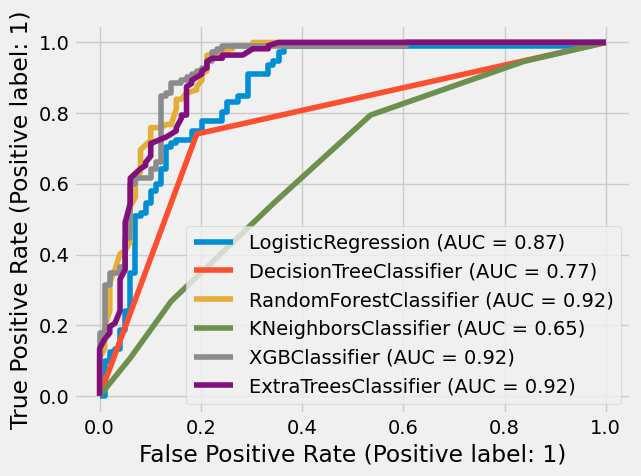

<Figure size 2500x2500 with 0 Axes>

In [ ]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ext, x_test, y_test, ax = disp.ax_)
plt.figure(figsize = (25,25))
plt.show()

We can see KNeighborsClassifier is giving least difference in accuracy and cv score but its AUC is very less


RandomForestClassifier is giving least in accuracy and cv score next to KNeighborsClassifier, and its AUC also High, that is it is showing better model performance than KNeighborsClassifier.


ExtraTreesClassifier and XGBClassifier are showing almost same AUC as RandomForestClassifier, but their the difference in accuracy and cv score is higher than RandomForestClassifier.


Considering above observations I am selecting RandomForestClassifier as a best suitable algorithm for this model.

## **Hyperparameter Tuning**

In [ ]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[500,700,1000,1200],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [ ]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [500, 700, 1000, 1200]})

In [ ]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
#lets check the results of final model with best parameters
model = RandomForestClassifier(criterion = 'gini', max_depth = 22, min_samples_split = 2,  n_estimators = 1200)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("------------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 84.83412322274881%
--------------------------------------------------------
roc_auc_score: 84.6590909090909%
--------------------------------------------------------
Confusion Matrix : 
 [[81 18]
 [14 98]]

------------------------------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84        99
           1       0.84      0.88      0.86       112

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



Great we have got improved accuracy after hyperparameter tuning.

## **AUC ROC CURVE for final model**

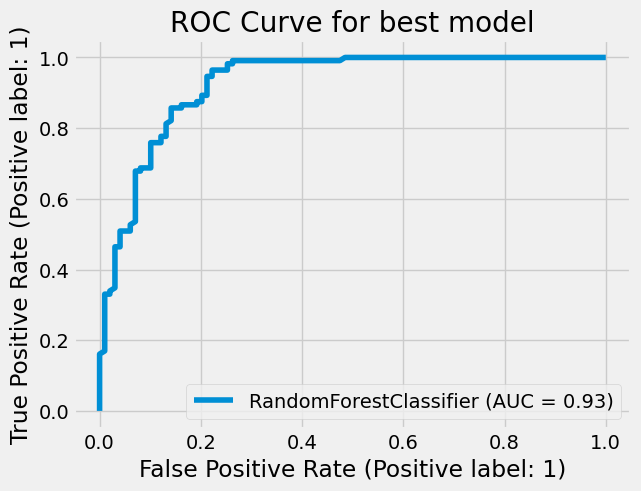

In [ ]:
plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for best model')
plt.show()

Great after hyperparameter tuning we got improvement in roc curve and AUC also.

# ***Test_Data_Set***

In [ ]:
test = pd.read_csv('/content/test_lAUu6dG.csv')
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
L_ID = test['Loan_ID']
test = test.drop(columns='Loan_ID')

In [ ]:
test.shape

(367, 11)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [ ]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Treating null values

In [ ]:
#Lets replace null values from all missing  numerical columns with the mean value of that column
test["LoanAmount"].fillna(test["LoanAmount"].mean(),inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mean(),inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mean(),inplace=True)

In [ ]:
#Lets replace null values from  all missing  Categorical columns with the mean value of that column
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [ ]:
column = ['Dependents']
for i in column:
    test[i] = test[i].replace({'3+':3, np.nan:0})

In [ ]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
#lets convert TotalCharges to numeric data
test["Dependents"]=test["Dependents"].str.strip()
test["Dependents"]=pd.to_numeric(test["Dependents"])

In [ ]:
test.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
#Lets check which columns contains '?'
df[df.columns[(df == '?').any()]].nunique()


Series([], dtype: float64)

In [ ]:
#lets separate numerical and categorical features for scaling and encoding
num = test._get_numeric_data()
cat = test.select_dtypes(include=['object'])

In [ ]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
test_num = scaler.fit_transform(num)
test_num = pd.DataFrame(test_num,columns=num.columns)

In [ ]:
#combine both numerical and categorical features
test = pd.concat([test_num,cat], axis = 1)

In [ ]:
test.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area
0,-0.705571,0.186461,-0.673335,-0.429368,0.270603,0.47918,Male,Yes,Graduate,No,Urban
1,0.565259,-0.352692,-0.029848,-0.166482,0.270603,0.47918,Male,Yes,Graduate,No,Urban
2,1.836088,0.039641,0.098849,1.180807,0.270603,0.47918,Male,Yes,Graduate,No,Urban
3,1.836088,-0.502774,0.418877,-0.593671,0.270603,0.00000,Male,Yes,Graduate,No,Urban
4,-0.705571,-0.311909,-0.673335,-0.955139,0.270603,0.47918,Male,No,Not Graduate,No,Urban


In [ ]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes == "object" :
        test[i] = enc.fit_transform(test[i].values.reshape(-1,1))

In [ ]:
#lets drop Dependdent column
test.drop(columns = 'Dependents', inplace = True)

In [ ]:
test.shape

(367, 10)

In [ ]:
test.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,1.0,1.0,0.0,0.0,2.0
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,1.0,1.0,0.0,0.0,2.0
2,0.039641,0.098849,1.180807,0.270603,0.47918,1.0,1.0,0.0,0.0,2.0
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,1.0,1.0,0.0,0.0,2.0
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,1.0,0.0,1.0,0.0,2.0


In [ ]:
#lets predict the price with our best model
prediction = model.predict(test)

In [ ]:
prediction

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#lets make the dataframe for prediction
Loan_st = pd.DataFrame(prediction, columns=["Loan_Status"])

In [ ]:
Loan_st.shape

(367, 1)

In [ ]:
#Loan_ID = test.drop(columns = 'Loan_ID')
#Loan_ID = test['Loan_ID']

KeyError: ignored

In [ ]:
Loan_st.shape

(367, 1)

In [ ]:
Loan_ID.shape

(367,)

In [ ]:
loan_file = pd.concat([L_ID, Loan_st], axis = 1)

In [ ]:
loan_file.head(5)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [ ]:
loan_file['Loan_Status']= loan_file['Loan_Status'].replace({0.0:'N',1.0:'Y'})

In [ ]:
loan_file.head(5)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [ ]:
loan_file.shape

(367, 2)

In [ ]:
#Lets save the submission to csv
loan_file.to_csv("predicted_loan_status.csv",index=False)

# ***Thank You***